<h2> Exercise 7 </h2>

<h4> Task 1 </h4>
<p> In this task we will be creating our own multiobjective optimization problem from our own life. </p>
<p> Our problem is fitness goal multiobjective optimization problem</p>
    
Here we will consider three different things regarding our fitness goals:

<li> Time spent building muscle. A function that relates the number of hours spent on strenght training </li>
<li> Time spent at improvement of cardiovascular health. </li>
<li> Time spent at losing weight. A nonlinear function that describes the trade-off between building muscle and losing weight. </li>

<p> We will want to build muscle while also losing weight at the same time. These goals are in conflight with each other so we will have a constraint to take this into account. our contraint will ensure that the total amount of weight loss is no more than 10% of the total time spent on strength training. </p>

<p> Our optimization problem will be as follows: </p>


$$
\begin{equation}
\begin{aligned}
\begin{cases}
 \max & \{ x_1 \textit{ , } x_2 \textit{ , } \frac{-x_3}{(1 + x_1)} \} \\
\text{s.t.}   & x_1 + x_2 + x_3 ≤ T \\
 \qquad  & x_3 ≤ 0.1 x_1 \\
\end{cases}
\end{aligned}
\end{equation}
$$

Where $T$ is the maximum time used for fitness activities

<p> We can write this problem as follows: </p> 

$$
\begin{equation}
\begin{aligned}
\begin{cases}
\max  & f_1(x_1) = x_1 \\
\max & f_2(x_2) = x_2 \\
\max  & f_3(x_1, x_3) =  \frac{-x_3}{(1 + x_1)} \\
\text{s.t.} \qquad &  x_1 + x_2 + x_3 ≤ T \\
   \qquad  & x_3 ≤ 0.1 x_1 \\
\end{cases}
\end{aligned}
\end{equation}
$$

<p> And then make it into a minimization problem by multiplying all of the functions with $-1$: </p> 

$$
\begin{equation}
\begin{aligned}
\begin{cases}
\min  & f_1(x_1) = -x_1 \\
\min  & f_2(x_2) = -x_2 \\
\min  & f_3(x_1, x_3) =  \frac{x_3}{(1 + x_1)} \\
\text{s.t.}  &  x_1 + x_2 + x_3 ≤ T \\
    \qquad  & x_3 ≤ 0.1 x_1 \\
\end{cases}
\end{aligned}
\end{equation}
$$

In [49]:
#imports
#!pip install desdeo
import numpy as np
import matplotlib.pyplot as plt
from desdeo_problem import MOProblem, Variable, ScalarObjective, ScalarConstraint
from desdeo_mcdm.utilities import payoff_table_method
from desdeo_mcdm.interactive.NIMBUS import NIMBUS
from desdeo_mcdm.utilities.solvers import solve_pareto_front_representation


In [96]:
#Functions
def f_1(x: np.ndarray):
    x = np.atleast_2d(x)
    return -1 * (x[:,0])

def f_2(x: np.ndarray):
    x = np.atleast_2d(x)
    return -1*(x[:,1])

def f_3(x: np.ndarray):
    x = np.atleast_2d(x)
    return -1 * (-x[:,2] / (1 + x[:,0]))

In [97]:
#Constraints
const_func1 = lambda x,y: x[:,0] + x[:,1] + x[:,2] - 24 
const_func2 = lambda x,y: x[:,2] - 0.1 * x[:,0]

#Objectives functions
f1 = ScalarObjective(name = "f_1", evaluator = f_1)
f2 = ScalarObjective(name = "f_2", evaluator = f_2)
f3 = ScalarObjective(name = "f_3", evaluator = f_3)

#f4 = ScalarObjective(name = "con1", evaluator = constraint3)
objectives = [f1, f2, f3]

#help(Variable)
x_1 = Variable("x_1", 5 , 0. , 10.)
x_2 = Variable("x_2", 5 , 0. , 10.)
x_3 = Variable("x_3", 1 , 0. , 10. )
variables = [x_1, x_2, x_3]

#Constraints
#help(ScalarConstraint)
con2 = ScalarConstraint("con", 3, 3, evaluator = const_func1)
con1 = ScalarConstraint("con", 3, 3, evaluator = const_func2)

constraints = [con1, con2]

In [52]:
#Finding the ideal and nadir vectors without using constraints:
mo_problem = MOProblem(variables = variables, objectives = objectives, constraints = constraints)

# Compute the ideal and nadir points using payoff_table_method
ideal, nadir = payoff_table_method(mo_problem)

mo_problem.ideal = ideal
mo_problem.nadir = nadir

print("Ideal: ", mo_problem.ideal)
print("Nadir: ", mo_problem.nadir)


/Users/sepuliini/opt/anaconda3/lib/python3.9/site-packages/desdeo_problem/problem/Problem.py:1160: UserWarning: Some decision variable values violate upper bounds
  warn("Some decision variable values violate upper bounds")
/Users/sepuliini/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


Ideal:  [-9.99999895 -9.99999895  0.36374398]
Nadir:  [-9.44319761 -7.54092058  0.82566808]


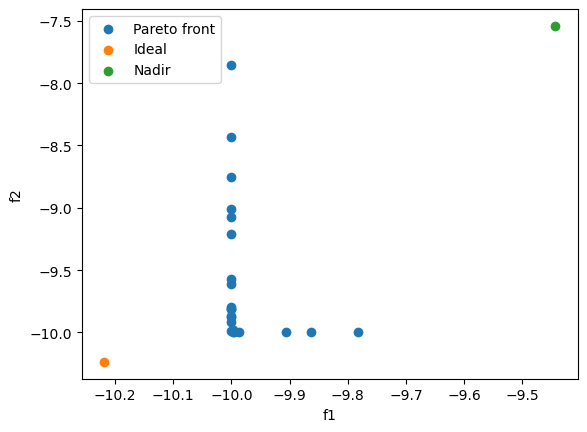

In [98]:
#Let's see the pareto front:
#Pareto front without constraints
p_front = solve_pareto_front_representation(mo_problem, step= .5)[1]
plt.scatter(p_front[:, 0], p_front[:, 1], label="Pareto front")
plt.scatter(mo_problem.ideal[0], mo_problem.ideal[1], label="Ideal")
plt.scatter(mo_problem.nadir[0], mo_problem.nadir[1], label="Nadir")
plt.xlabel("f1")
plt.ylabel("f2")
plt.legend()
plt.show()

In [78]:
#Using NIMBUS method:
nimbus = NIMBUS(mo_problem)
classification_request, _ = nimbus.start()
print(classification_request.content["message"])

Please classify each of the objective values in one of the following categories:
	1. values should improve '<'
	2. values should improve until some desired aspiration level is reached '<='
	3. values with an acceptable level '='
	4. values which may be impaired until some upper bound is reached '>='
	5. values which are free to change '0'
Provide the aspiration levels and upper bounds as a vector. For categories 1, 3, and 5,the value in the vector at the objective's position is ignored. Supply also the number of maximumsolutions to be generated.


/Users/sepuliini/opt/anaconda3/lib/python3.9/site-packages/desdeo_problem/problem/Problem.py:1160: UserWarning: Some decision variable values violate upper bounds
  warn("Some decision variable values violate upper bounds")


In [79]:
print(classification_request.content["objective_values"])

[-9.99978587 -9.99970832  0.36371585]


In [80]:
print(classification_request.content["classifications"])

[None]


In [87]:
response = {
    "classifications": ["0", "0", "<"],
    "number_of_solutions": 3,
    "levels": [0. , 0. , 0.2]
}
classification_request.response = response

In [88]:
save_request, plot_request = nimbus.iterate(classification_request)

In [89]:
print(save_request.content.keys())
print(save_request.content["message"])
print(save_request.content["objectives"])

dict_keys(['message', 'solutions', 'objectives', 'indices'])
Please specify which solutions shown you would like to save for later viewing. Supply the indices of such solutions as a list, or supply an empty list if none of the shown solutions should be saved.
[array([-9.99999885, -9.9999828 ,  0.36364109]), array([-9.99999876, -9.99999884,  0.36363664]), array([-9.99896859, -9.99850932,  0.36403439])]


In [90]:
#Let's say that the choices 0,1 and 2 are the best ones.
response = {"indices": [0,2]}
save_request.response = response

intermediate_request, plot_request = nimbus.iterate(save_request)

In [91]:
print(intermediate_request.content.keys())
print(intermediate_request.content["message"])

dict_keys(['message', 'solutions', 'objectives', 'indices', 'number_of_desired_solutions'])
Would you like to see intermediate solutions between two previously computed solutions? If so, please supply two indices corresponding to the solutions.


In [92]:
response = {"number_of_desired_solutions": 0, "indices": []}
intermediate_request.response = response

preferred_request, plot_request = nimbus.iterate(intermediate_request)

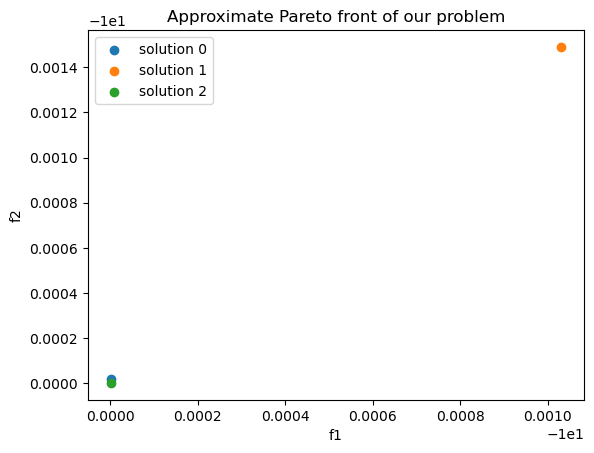

In [104]:
#plt.scatter(p_front[:, 0], p_front[:, 1], label="Pareto front")
#plt.scatter(mo_problem.ideal[0], mo_problem.ideal[1], label="Ideal")
#plt.scatter(mo_problem.nadir[0], mo_problem.nadir[1], label="Nadir")
for i, z in enumerate(preferred_request.content["objectives"]):
    plt.scatter(z[0], z[1], label=f"solution {i}")
plt.xlabel("f1")
plt.ylabel("f2")
plt.title("Approximate Pareto front of our problem")
plt.legend()
plt.show()

In [95]:
#In this case interpreting the optimal solution is hard. Biggest problem with this was that my
#optimization function was not that good. 
#We can still see that in this case the solution 1 is the worst one. Solution 0 and 2 are really close to ideal.